# 総合演習問題

In [82]:
#ライブラリインストール
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import time

#可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#機械学習ライブラリ
import sklearn

#少数第３位まで表示
%precision 3

'%.3f'

### 総合演習問題（１）

1797
1797


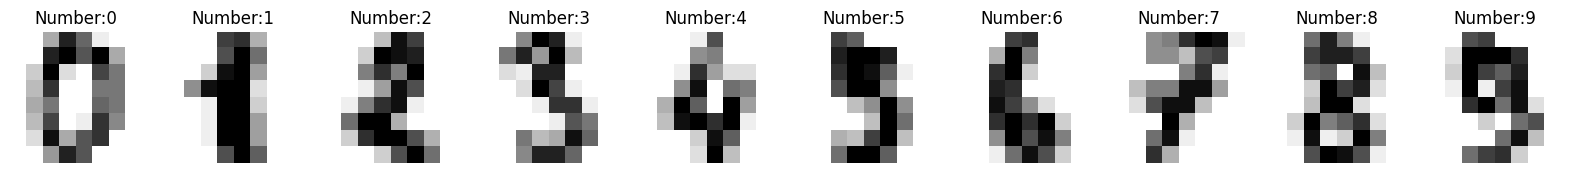

In [8]:
#分析対象データ
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

digits = load_digits()

#画像の表示
plt.figure(figsize=(20,5))
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(1, 10, label+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Number:{0}'.format(label))

print(len(digits.target))
print(len(digits.data))

In [14]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    stratify=digits.target,
                                                    random_state=0)

models = {
    'log':LogisticRegression(),
    'svm':LinearSVC(random_state=0),
    'tree':DecisionTreeClassifier(random_state=0),
    'k-NN':KNeighborsClassifier(n_neighbors=10),
    'randomforest':RandomForestClassifier(random_state=0),
    'GradientBoost':GradientBoostingClassifier(random_state=0)
}

scores = {}
for model_name, model in models.items():

    #k分割交差検証の実行
    #score = cross_val_score(tree, cancer.data, cancer.target, cv=5)
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()
#ランダムフォレストが最もtest_scoreが高い

/Users/tanakakosei/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tanakakosei/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,test_score,train_score
GradientBoost,0.964444,1.000000
k-NN,0.975556,0.987379
log,0.957778,1.000000
randomforest,0.982222,1.000000
svm,0.933333,0.979213
tree,0.855556,1.000000


In [15]:
#混同行列の表示
from sklearn.metrics import confusion_matrix

best_model = RandomForestClassifier(random_state=0)
best_model.fit(X_train, y_train)
y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n{}'.format(m))

Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  1  0  0  0  0  1  1]
 [ 0  1 43  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  2  0]
 [ 0  0  0  0 43  1  0  0  1  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  2  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  2  0  0  0  0  1 42]]


### 総合演習問題(2)

In [17]:
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
res = requests.get(url).content

#取得したデータをDataframeオブジェクトとして読み込み
auto_ori = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

auto_ori

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [31]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

auto_ori.columns = ['Sex', 'Length', 'Diam', 'Height', 'Whole', 'Shucked','Viscera','Shell','Rings']

#sexがカテゴリ変数のため数値に変更
sex_dummies = le.fit_transform(auto_ori['Sex'])
auto_ori['Sex'] = sex_dummies


#目的変数にpriceを指定、説明変数にそれ以外を指定
X = auto_ori.drop('Rings', axis=1)
y = auto_ori['Rings']

#訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0)


models = {
    'log':LogisticRegression(),
    'svm':LinearSVC(random_state=0),
    'tree':DecisionTreeRegressor(random_state=0),
    'k-NN':KNeighborsRegressor(n_neighbors=10),
    'randomforest':RandomForestRegressor(random_state=0),
    'GradientBoost':GradientBoostingRegressor(random_state=0)
}

scores = {}
for model_name, model in models.items():

    #k分割交差検証の実行
    #score = cross_val_score(tree, cancer.data, cancer.target, cv=5)
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

/Users/tanakakosei/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,test_score,train_score
GradientBoost,0.534453,0.651649
k-NN,0.555485,0.616879
log,0.247847,0.269476
randomforest,0.547848,0.935077
svm,0.244019,0.275223
tree,0.155077,1.000000


### 総合演習問題(3)

問１

In [35]:
#対象データを読み込み
bank = pd.read_csv('bank-full.csv', sep=';')

#数値データにおける基本統計量を算出
bank.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


問２

In [42]:
# ext_bank = bank[['job', 'marital', 'education', 'default', 'housing', 'loan']]
# ext_bank
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan']:

    display(bank.groupby(column, as_index=False)['y'].value_counts())

,job,y,count
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


,marital,y,count
0,divorced,no,4585
1,divorced,yes,622
2,married,no,24459
3,married,yes,2755
4,single,no,10878
5,single,yes,1912


,education,y,count
0,primary,no,6260
1,primary,yes,591
2,secondary,no,20752
3,secondary,yes,2450
4,tertiary,no,11305
5,tertiary,yes,1996
6,unknown,no,1605
7,unknown,yes,252


,default,y,count
0,no,no,39159
1,no,yes,5237
2,yes,no,763
3,yes,yes,52


,housing,y,count
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


,loan,y,count
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


問題3

In [69]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#カテゴリ変数をダミー変数に変更
#pandasのget_dummies関数を用いてダミー変数化
bank_dummy = pd.get_dummies(bank[['job', 'marital', 'education', 'default', 'housing', 'loan']])
#目的変数(classes)もフラグ化(0/1)する
bank_dummy['y'] = bank['y'].map(lambda x: 1 if x=='yes' else 0)


#目的変数にpriceを指定、説明変数にそれ以外を指定
X = pd.concat([bank_dummy.drop('y', axis=1), bank[['age', 'balance', 'campaign']]], axis=1)
y = bank_dummy['y']


#訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0)

models = {
    'log':LogisticRegression(),
    'svm':LinearSVC(random_state=0),
    'tree':DecisionTreeClassifier(random_state=0),
    'k-NN':KNeighborsClassifier(n_neighbors=10),
    'randomforest':RandomForestClassifier(random_state=0),
    'GradientBoost':GradientBoostingClassifier(random_state=0)
}

scores = {}

for model_name, model in models.items():

    #import ipdb; ipdb.set_trace()
    print(f'============{model_name}============\n')
    model.fit(X_train, y_train)

    #テストデータを使って予測値を算出
    y_pred = model.predict(X_test)
    m = confusion_matrix(y_test, y_pred)
    print('Confusion_matrix:\n{}'.format(m))

    
    accuracy = (m[0,0] + m[1,1]) / m.sum()
    precision = (m[1,1])/m[:,1].sum()
    recall = (m[1,1])/m[1,:].sum()
    f1 = 2*(precision * recall)/(precision + recall)

    print('正解率:{:.3f}'.format(accuracy))
    print('適合率:{:.3f}'.format(precision))
    print('再現率:{:.3f}'.format(recall))
    print('F1値:{:.3f}'.format(f1))


    

============log============



/Users/tanakakosei/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/4k/80zrk7vn7sz0nf5g0vbzv4540000gp/T/ipykernel_32596/1875692436.py:50: RuntimeWarning: invalid value encountered in scalar divide
  precision = (m[1,1])/m[:,1].sum()


Confusion_matrix:
[[9978    0]
 [1325    0]]
正解率:0.883
適合率:nan
再現率:0.000
F1値:nan
============svm============



/Users/tanakakosei/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion_matrix:
[[9902   76]
 [1317    8]]
正解率:0.877
適合率:0.095
再現率:0.006
F1値:0.011
============tree============

Confusion_matrix:
[[8905 1073]
 [ 961  364]]
正解率:0.820
適合率:0.253
再現率:0.275
F1値:0.264
============k-NN============

Confusion_matrix:
[[9946   32]
 [1301   24]]
正解率:0.882
適合率:0.429
再現率:0.018
F1値:0.035
============randomforest============

Confusion_matrix:
[[9667  311]
 [1088  237]]
正解率:0.876
適合率:0.432
再現率:0.179
F1値:0.253
============GradientBoost============

Confusion_matrix:
[[9940   38]
 [1296   29]]
正解率:0.882
適合率:0.433
再現率:0.022
F1値:0.042


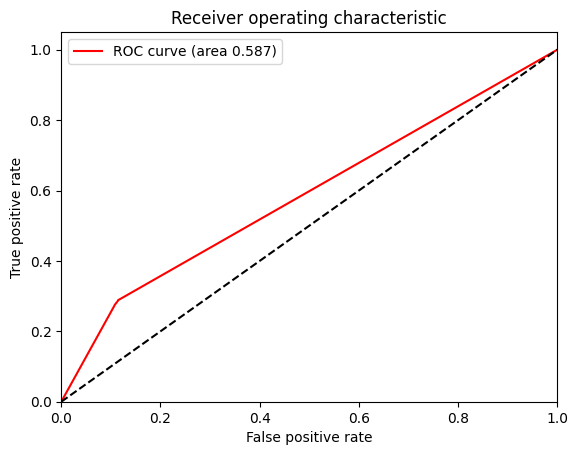

In [71]:
#SVCによる予測確率の取得
from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

#予測確率を取得
y_pred = model.predict_proba(X_test)[:,1]

#偽陽性率と真陽性率の算出
fpr, tpr, threshold = roc_curve(y_test, y_pred)

#AUCの算出
auc = auc(fpr, tpr)

#ROC曲線の描画
plt.plot(fpr, tpr, color='red', label='ROC curve (area %.3f)'%auc)
plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='best')

### 総合演習問題(4)

- ベースモデル

In [75]:
from sklearn.preprocessing import StandardScaler

#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0
)

#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.metrics import confusion_matrix

model = LogisticRegression()
clf = model.fit(X_train_std, y_train)
print("train:", clf.__class__.__name__, clf.score(X_train_std, y_train))
print("test:", clf.__class__.__name__, clf.score(X_test_std, y_test))

pred_y = clf.predict(X_test_std)
confusion_m = confusion_matrix(y_test, pred_y)

print("confusion_matrix:\n{}".format(confusion_m))

train: LogisticRegression 0.9906103286384976
test: LogisticRegression 0.958041958041958
confusion_matrix:
[[50  3]
 [ 3 87]]


- 改良

In [80]:
from sklearn.preprocessing import StandardScaler

#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import AdaBoostClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0
)

#標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.metrics import confusion_matrix

#ブースティングの処理を追加
model = AdaBoostClassifier(LogisticRegression(), random_state=0)


clf = model.fit(X_train_std, y_train)
print("train:", clf.__class__.__name__, clf.score(X_train_std, y_train))
print("test:", clf.__class__.__name__, clf.score(X_test_std, y_test))

pred_y = clf.predict(X_test_std)
confusion_m = confusion_matrix(y_test, pred_y)

print("confusion_matrix:\n{}".format(confusion_m))

train: AdaBoostClassifier 0.9859154929577465
test: AdaBoostClassifier 0.965034965034965
confusion_matrix:
[[51  2]
 [ 3 87]]


### 総合演習問題(5)

In [83]:
import pandas_datareader.data as pdr

start_date = '2001-01-02'
end_date = '2016-12-30'

fx_jpusdata = pdr.DataReader('DEXJPUS', 'fred', start_date, end_date)
fx_useudata = pdr.DataReader('DEXUSEU', "fred", start_date, end_date)

問題１

In [95]:
#自力（だいたい合ってる）
fx_jpusdata = fx_jpusdata['DEXJPUS'].interpolate('ffill')
fx_useudata = fx_useudata['DEXUSEU'].interpolate('ffill')

問題２

In [99]:
#各統計量の確認
print(fx_jpusdata.describe())
print('=====================')
print(fx_useudata.describe())

count    4174.000000
mean      105.775220
std        14.612526
min        75.720000
25%        95.365000
50%       108.105000
75%       118.195000
max       134.770000
Name: DEXJPUS, dtype: float64
count    4174.000000
mean        1.239633
std         0.165265
min         0.837000
25%         1.128100
50%         1.274700
75%         1.352575
max         1.601000
Name: DEXUSEU, dtype: float64


<Axes: xlabel='DATE'>

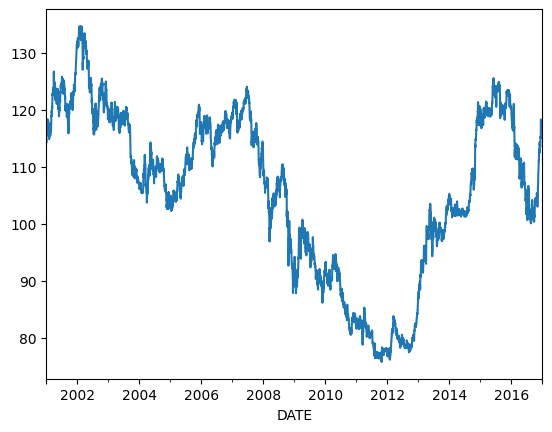

In [144]:
#時系列データ
fx_jpusdata.plot()

<Axes: xlabel='DATE'>

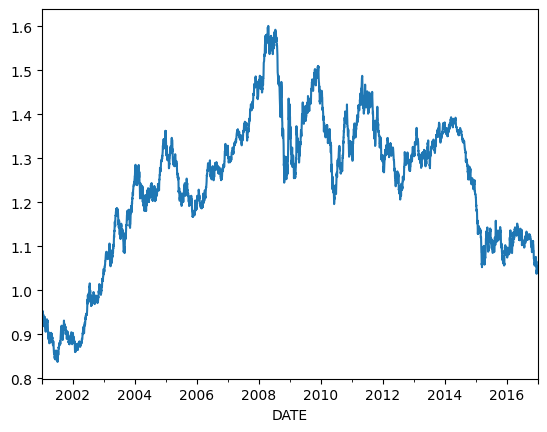

In [145]:
fx_useudata.plot()

In [102]:
#変化率（当日-前日)/前日
fx_jpusdata_ratio = (fx_jpusdata-fx_jpusdata.shift(1))/fx_jpusdata.shift(1)
fx_useudata_ration = (fx_useudata-fx_useudata.shift(1))/fx_useudata.shift(1)

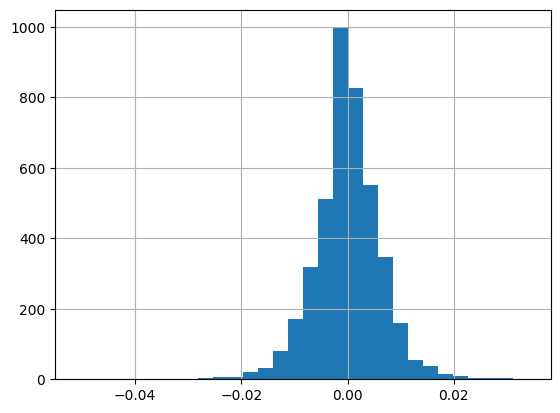

In [109]:
#fx_jpusdataのヒストグラムグラム
#plt.figure(figsize=(20,6))

plt.hist(fx_jpusdata_ratio, bins=30)
plt.grid(True)

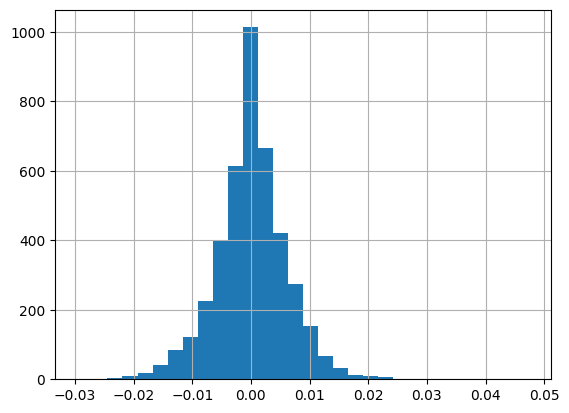

In [110]:
#fx_jpusdataのヒストグラムグラム
#plt.figure(figsize=(20,6))

plt.hist(fx_useudata_ration, bins=30)
plt.grid(True)

問題4

In [146]:
#重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

#fx_jpusdataの予測モデル
jpus_train = fx_jpusdata[(fx_jpusdata.index >= '2016-11-01') & (fx_jpusdata.index < '2016-12-01')]
jpus_train_concat = pd.concat([jpus_train.shift(1), jpus_train.shift(2), jpus_train.shift(3), jpus_train], axis=1)
jpus_train_concat.columns = ['b1', 'b2', 'b3', 'target']

jpus_test = fx_jpusdata[(fx_jpusdata.index >= '2016-12-01') & (fx_jpusdata.index < '2017-01-01')]
jpus_test_concat = pd.concat([jpus_test.shift(1), jpus_test.shift(2), jpus_test.shift(3), jpus_test], axis=1)
jpus_test_concat.columns = ['b1', 'b2', 'b3', 'target']

#Nanが含まれている行を削除
jpus_train_concat = jpus_train_concat.dropna()
jpus_test_concat = jpus_test_concat.dropna()

X_train = jpus_train_concat[['b1', 'b2', 'b3']]
y_train = jpus_train_concat[['target']]
X_test = jpus_test_concat[['b1', 'b2', 'b3']]
y_test = jpus_test_concat[['target']]

#重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train, y_train)

#決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train, y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test, y_test)))

# #回帰係数と切片を表示
# print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X_train.columns)))
# print('切片:{:.3f}'.format(model.intercept_))

決定係数(train):0.960
決定係数(test):0.539


In [143]:
#ターゲットデータ
#重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

#fx_jpusdataの予測モデル
useudata_train = fx_useudata[(fx_useudata.index >= '2016-11-01') & (fx_useudata.index < '2016-12-01')]
useudata_train_concat = pd.concat([useudata_train.shift(1), useudata_train.shift(2), useudata_train.shift(3), useudata_train], axis=1)
useudata_train_concat.columns = ['b1', 'b2', 'b3', 'target']

useudata_test = fx_useudata[(fx_useudata.index >= '2016-12-01') & (fx_useudata.index < '2017-01-01')]
useudata_test_concat = pd.concat([useudata_test.shift(1), useudata_test.shift(2), useudata_test.shift(3), useudata_test], axis=1)
useudata_test_concat.columns = ['b1', 'b2', 'b3', 'target']

#Nanが含まれている行を削除
useudata_train_concat = useudata_train_concat.dropna()
useudata_test_concat = useudata_test_concat.dropna()

X_train = useudata_train_concat[['b1', 'b2', 'b3']]
y_train = useudata_train_concat[['target']]
X_test = useudata_test_concat[['b1', 'b2', 'b3']]
y_test = useudata_test_concat[['target']]

#重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train, y_train)

#決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train, y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test, y_test)))

#回帰係数と切片を表示
# print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X_train.columns)))
# print('切片:{:.3f}'.format(model.intercept_))

決定係数(train):0.948
決定係数(test):0.388
